In [54]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from argparse import ArgumentParser
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
import seaborn as sns
from sklearn.manifold import TSNE
import astropy.io.fits as fits

%matplotlib inline



In [5]:
ls DeepLearningA1/data

processed/         total_data.p       vae_encodings.tr   vae_targets.val
raw/               train_labeled.p    vae_encodings.val  validation.p
test.p             train_unlabeled.p  vae_targets.tr


In [6]:
def load_data():
    data_train = list(open('DeepLearningA1/data/vae_encodings.tr').readlines())
    targets_train = list(open('DeepLearningA1/data/vae_targets.tr').readlines())
    data_val = list(open('DeepLearningA1/data/vae_encodings.val').readlines())
    targets_val = list(open('DeepLearningA1/data/vae_targets.val').readlines())

    X_train = []
    y_train = []
    X_val = []
    y_val = []
    for vec, label in zip(data_train, targets_train):
        vec = vec.strip().split()
        vec = [float(num) for num in vec]
        label = label.strip()
        X_train.append(vec)
        y_train.append(float(label))
    for vec, label in zip(data_val, targets_val):
        vec = vec.strip().split()
        vec = [float(num) for num in vec]
        label = label.strip()
        X_val.append(vec)
        y_val.append(float(label))

    return [np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val)]

In [57]:
X_train, y_train, X_val, y_val = load_data()
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
#X_val = min_max_scaler.fit_transform(X_val)

In [23]:
RF_reg_final = RandomForestClassifier()
RF_reg_final.fit(X_train, y_train)
predicted = RF_reg_final.predict(X_val)

In [24]:
sum(predicted[i] == y_val[i] for i in range(len(y_val)))/len(y_val)

6597

In [59]:
svm = SVC()
svm.fit(X_train, y_train)
predicted = svm.predict(X_val)
100*sum(predicted[i] == y_val[i] for i in range(len(y_val)))/len(y_val)

80.459999999999994

In [46]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
#sum(kmeans.labels_[i] == y_train[i] for i in range(len(y_train))) / float(len(y_train))

In [52]:
def cluster(num_clusters, X, normalize = False):
    
    if normalize:
        X = preprocessing.normalize(X)
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter = 10000).fit(X)
    
    tsne = TSNE(perplexity=30, n_components=2, init='pca')
    low_dim = tsne.fit_transform(X[:500, :])
    
    plot = []
    for i in range(low_dim.shape[0]):
        plot.append(low_dim[i,:])
    plot_assignments = kmeans.labels_[:low_dim.shape[0]]
    total_assignments = kmeans.labels_
    clusters = [[] for i in range(num_clusters)]
    for i, (item, clustNum) in enumerate(zip(plot,plot_assignments)):
        clusters[clustNum].append(item)  
    colors = list("rcbgmyk")
    plt.figure(figsize=(6,5))
    for (i,cluster) in enumerate(clusters):
        plt.scatter([item[0] for item in cluster],[item[1] for item in cluster], color=colors[i % len(colors)], label = ("Cluster %d" %(i+1)))        
    plt.title("MNIST With %d Clusters" % num_clusters, fontsize = 14)
    #bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0., 
    plt.legend(fontsize = 12, markerscale = 2, frameon = True, shadow = True)
    plt.show()


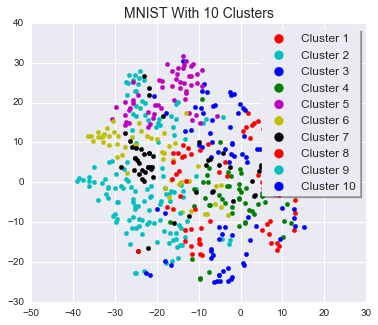

In [55]:
cluster(10, X_train)